In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,r2_score

In [7]:
df=pd.read_csv('tips (data for regression problem).csv')

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


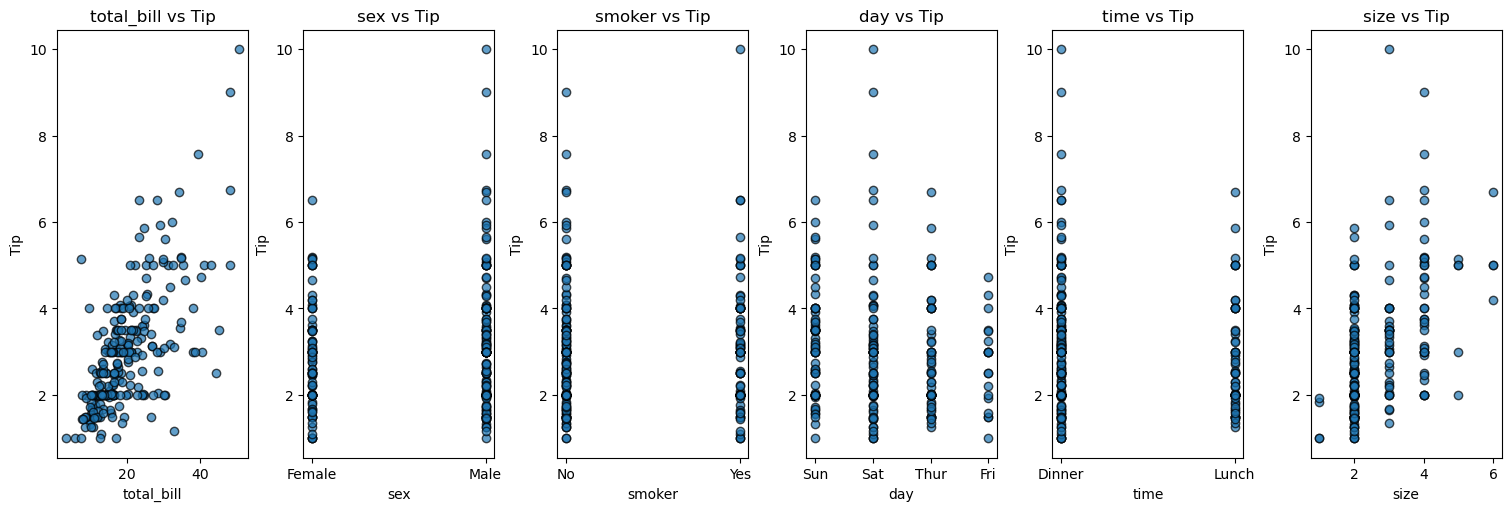

In [15]:

df_data = df.drop(columns=['tip'])
df_target = df['tip']

num_columns = len(df_data.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 5), constrained_layout=True)

for i, ax in enumerate(axes):
    ax.scatter(df_data.iloc[:, i], df_target, alpha=0.7, edgecolors='k')
    ax.set_xlabel(df_data.columns[i])
    ax.set_ylabel('Tip')
    ax.set_title(f'{df_data.columns[i]} vs Tip')
    plt.show()


<Axes: >

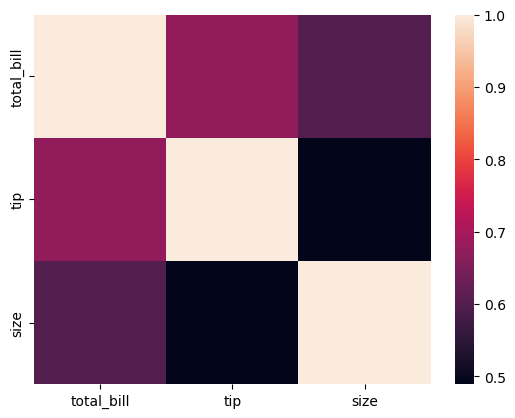

In [17]:
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

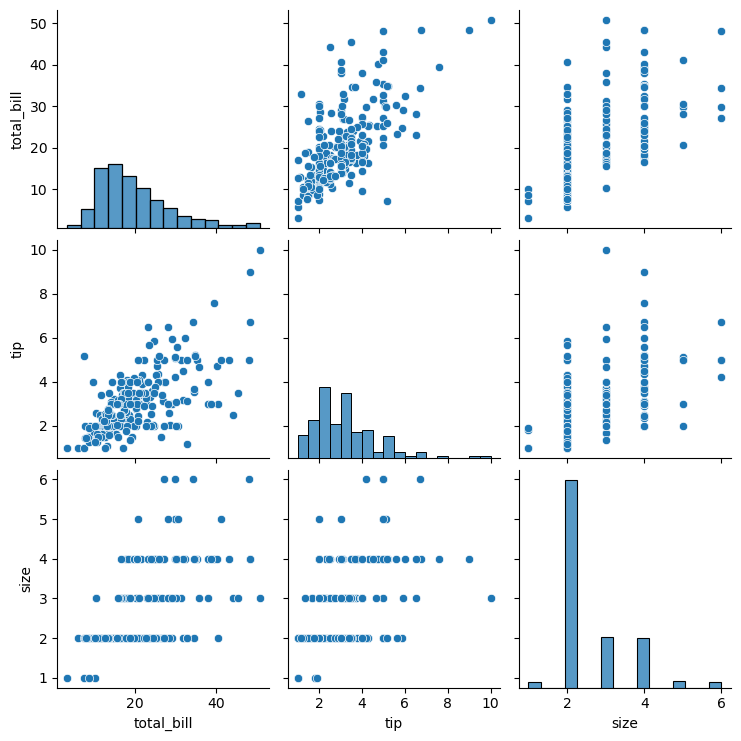

In [19]:
sns.pairplot(df)

In [21]:

label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_day = LabelEncoder()
label_encoder_time = LabelEncoder()

# Encode the categorical columns
df_data['sex'] = label_encoder_sex.fit_transform(df['sex'])
df_data['smoker'] = label_encoder_smoker.fit_transform(df['smoker'])
df_data['day'] = label_encoder_day.fit_transform(df['day'])
df_data['time'] = label_encoder_time.fit_transform(df['time'])


In [27]:
import statsmodels.api as sm

# Add a constant column for the intercept term
X = sm.add_constant(df_data)  # Keeps the original df_data unchanged
y = df_target
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     34.86
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.50e-30
Time:                        16:52:23   Log-Likelihood:                -347.78
No. Observations:                 244   AIC:                             709.6
Df Residuals:                     237   BIC:                             734.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7318      0.262      2.798      0.0

In [29]:
from statsmodels.stats.diagnostic import linear_rainbow

# Perform the Rainbow test for linearity
test_stat, p_value = linear_rainbow(model)

# Display the results
print(f"Rainbow Test Statistic: {test_stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value > 0.05:
    print("Fail to reject the null hypothesis: The model appears to be linear.")
else:
    print("Reject the null hypothesis: Evidence suggests the model may not be linear.")


Rainbow Test Statistic: 1.2036
P-value: 1.5798e-01
Fail to reject the null hypothesis: The model appears to be linear.


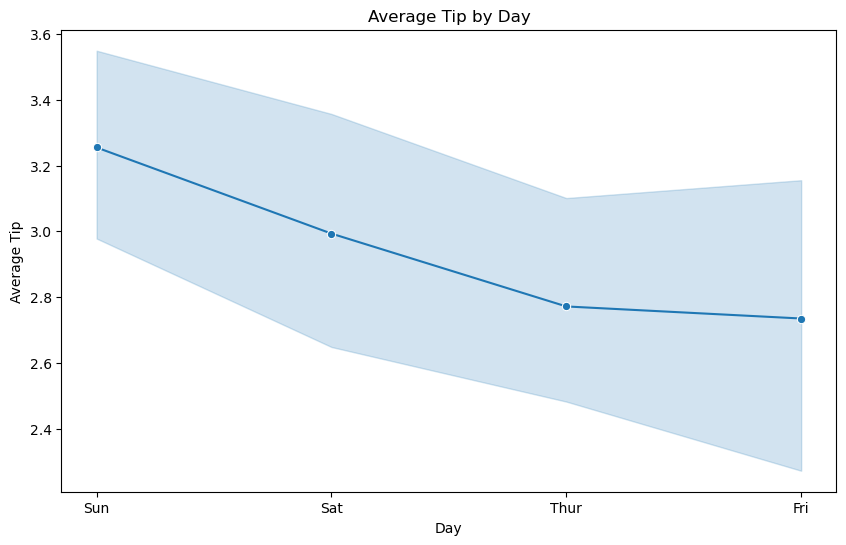

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [33]:

tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = tips_encoded.drop(columns=['tip'])  # Drop 'tip' to use it as the target
y = tips_encoded['tip']                 # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Display the shapes of the splits for confirmation
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (195, 8)
X_test shape: (49, 8)
y_train shape: (195,)
y_test shape: (49,)


In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define the models with their hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Initialize dictionaries to store results and feature importance
results = {}
feature_importance = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred_test = model.predict(X_test)  # Predict on the test set

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results[model_name] = {'MAE': mae, 'R-squared': r2}

    # Extract feature importance or coefficients if available
    if hasattr(model, 'coef_'):  # Linear models
        feature_importance[model_name] = model.coef_
    elif hasattr(model, 'feature_importances_'):  # Tree-based models
        feature_importance[model_name] = model.feature_importances_

# Display evaluation results
print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.4f}, R-squared = {metrics['R-squared']:.4f}")

# Display feature importance or coefficients
print("\nFeature Importance (or Coefficients):")
for model_name, importance in feature_importance.items():
    print(f"\n{model_name}:")
    for feature, value in zip(X.columns, importance):
        print(f"  {feature}: {value:.4f}")

# Management Insights
print("\nManagement Insights:")
insights = [
    "Encouraging higher spending can increase tip amounts, as larger 'total_bill' values often lead to higher tips.",
    "Promoting group visits may positively impact total tips, as party size ('size') shows a positive correlation with tip amounts.",
    "Focused strategies to increase 'total_bill' and attract larger groups could boost tips and enhance customer satisfaction."
]
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Model Evaluation Results:
Linear Regression: MAE = 0.6671, R-squared = 0.4373
Ridge Regression: MAE = 0.6665, R-squared = 0.4394
Lasso Regression: MAE = 0.6375, R-squared = 0.5273
Decision Tree: MAE = 0.8296, R-squared = -0.0042
Random Forest: MAE = 0.7549, R-squared = 0.2639
Support Vector Regression: MAE = 0.5679, R-squared = 0.5741
K-Nearest Neighbors: MAE = 0.7293, R-squared = 0.2914

Feature Importance (or Coefficients):

Linear Regression:
  total_bill: 0.0947
  size: 0.2335
  sex_Male: 0.0288
  smoker_Yes: -0.1924
  day_Sat: -0.1858
  day_Sun: -0.0508
  day_Thur: -0.1797
  time_Lunch: 0.0950

Ridge Regression:
  total_bill: 0.0947
  size: 0.2317
  sex_Male: 0.0273
  smoker_Yes: -0.1844
  day_Sat: -0.1670
  day_Sun: -0.0314
  day_Thur: -0.1424
  time_Lunch: 0.0780

Lasso Regression:
  total_bill: 0.0991
  size: 0.1081
  sex_Male: 0.0000
  smoker_Yes: -0.0000
  day_Sat: -0.0000
  day_Sun: 0.0000
  day_Thur: 0.0000
  time_Lunch: 0.0000

Decision Tree:
  total_bill: 0.7802
  size: 0

Training and evaluating Linear Regression...


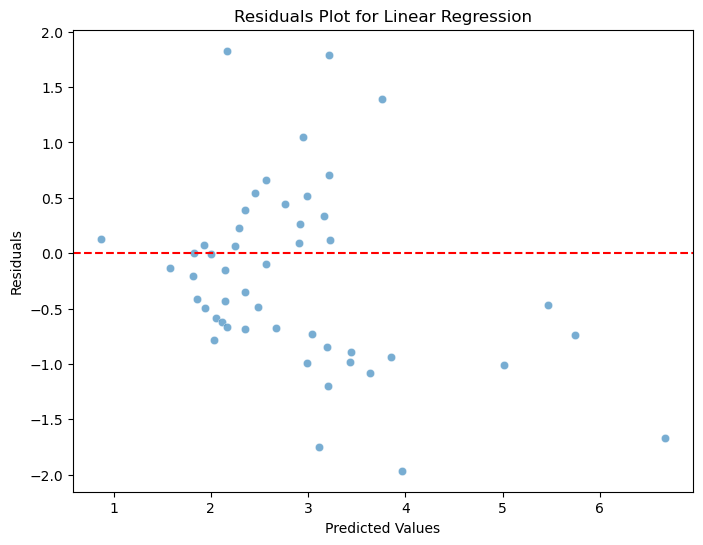

Training and evaluating Ridge Regression...


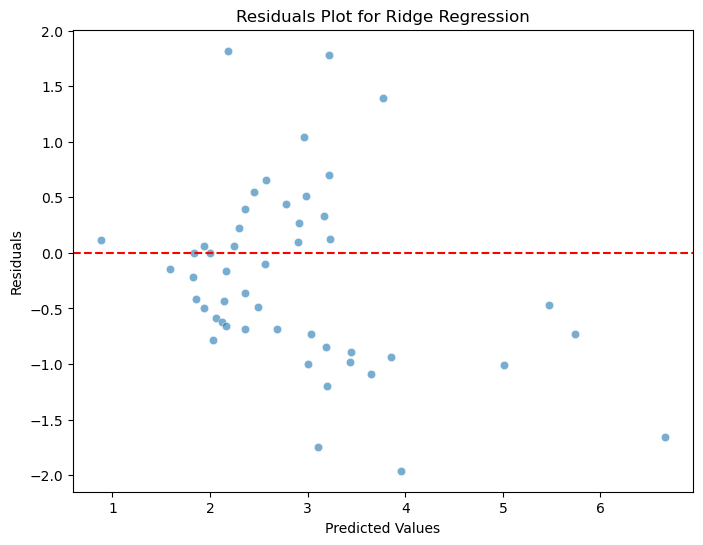

Training and evaluating Lasso Regression...


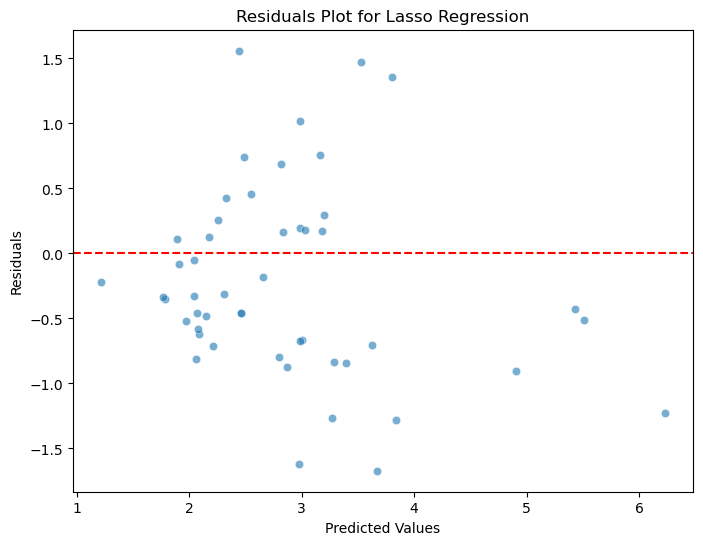

Training and evaluating Decision Tree Regression...


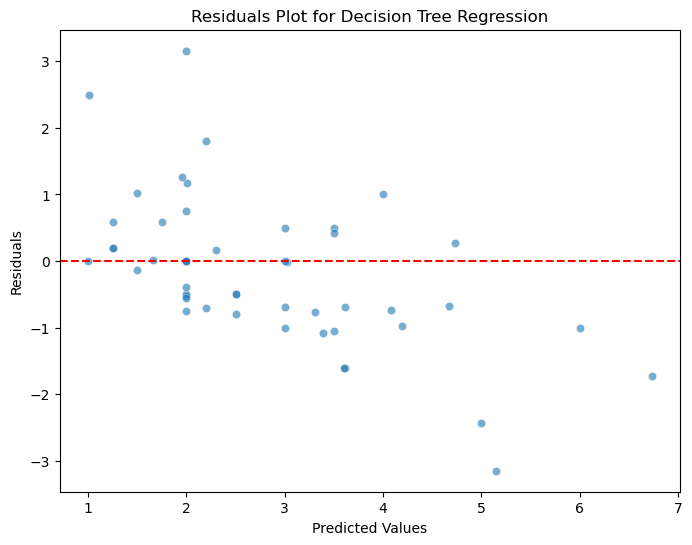

Training and evaluating Random Forest Regression...


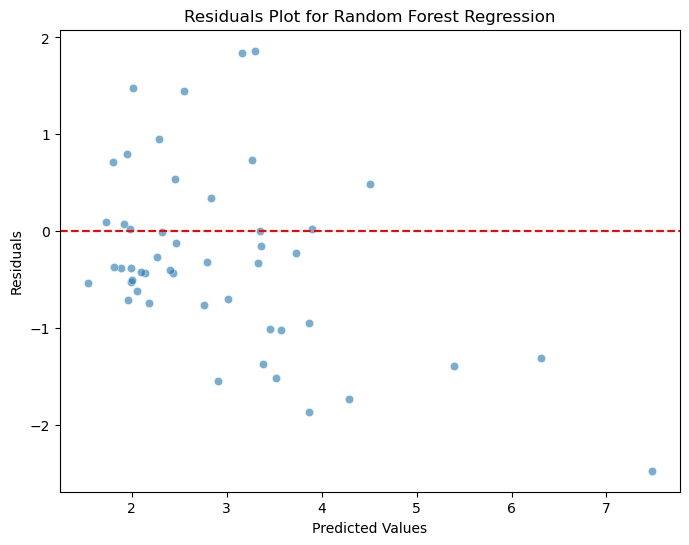

Training and evaluating Support Vector Regression (SVR)...


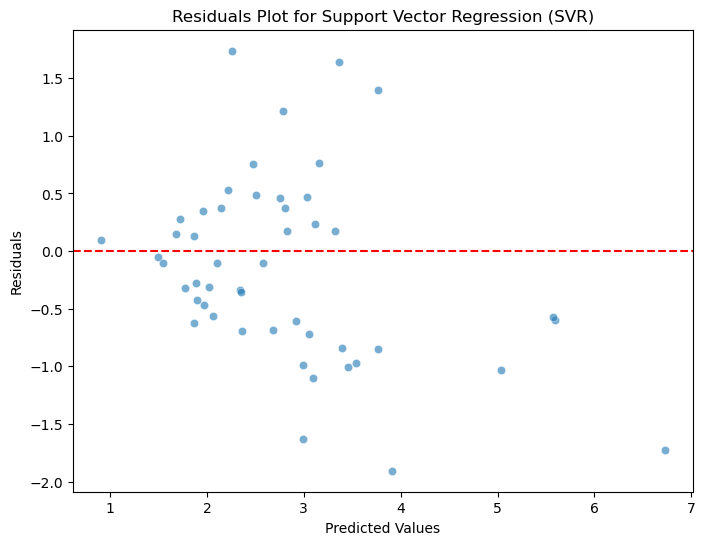

Training and evaluating K-Nearest Neighbors Regression...


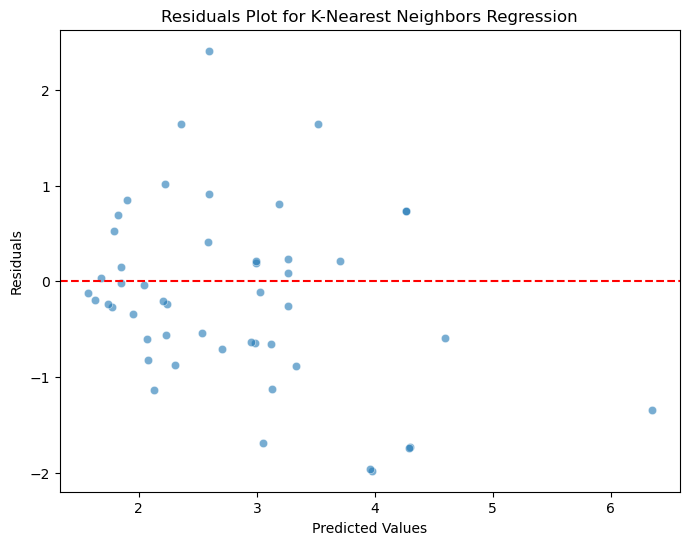

In [51]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression (SVR)': SVR(kernel='linear'),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)
}

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    """
    Plot residuals for a given model.
    """
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# Train, predict, and plot residuals for each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Ensure predictions are reshaped if necessary (e.g., for some regressors)
    if len(y_pred.shape) > 1:
        y_pred = y_pred.ravel()
    
    plot_residuals(y_test, y_pred, model_name)